In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

dataset link: https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTrain.csv

In [3]:
dfTest = pd.read_csv('/content/drive/MyDrive/Data Mining Project/data/fraudTest.csv')
dfTrain = pd.read_csv('/content/drive/MyDrive/Data Mining Project/data/fraudTrain.csv')


In [4]:
dfTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
dfTest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
dfTrain.shape

(1296675, 23)

In [7]:
dfTest.shape

(555719, 23)

In [8]:
dfTrain.drop('Unnamed: 0', axis=1, inplace=True)
dfTest.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
dfTrain.shape

(1296675, 22)

In [10]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## Data Handling

In [11]:
dfTrain.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
dfTest.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing data

## Data preprocessing

In [13]:
dfTrain.select_dtypes('object').columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [14]:
for i in dfTrain.select_dtypes('object').columns:
  print(i,dfTrain[i].nunique())

trans_date_trans_time 1274791
merchant 693
category 14
first 352
last 481
gender 2
street 983
city 894
state 51
job 494
dob 968
trans_num 1296675


label encoding categorical

In [15]:
from sklearn.preprocessing import LabelEncoder

def data_handle(df):
  l=['merchant','category','gender','street','city','state','job']
  df.drop('trans_num', axis=1, inplace=True)
  df.drop('first', axis=1, inplace=True)
  df.drop('last', axis=1, inplace=True)
  df.drop('unix_time', axis=1, inplace=True)
  df.drop('dob', axis=1, inplace=True)
  df.drop('cc_num', axis=1, inplace=True)

  le = LabelEncoder()
  for i in l:
    df[i] = le.fit_transform(df[i])

In [16]:
data_handle(dfTrain)
data_handle(dfTest)

In [17]:
dfTrain.head()

,trans_date_trans_time,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0
1,2019-01-01 00:00:44,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0
2,2019-01-01 00:00:51,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0
3,2019-01-01 00:01:16,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0
4,2019-01-01 00:03:06,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0


In [18]:
def preprocess_date_time(df):
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
  df['hour'] = df['trans_date_trans_time'].dt.hour
  df['minute'] = df['trans_date_trans_time'].dt.minute
  df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
  df['day_of_month'] = df['trans_date_trans_time'].dt.day
  df['month'] = df['trans_date_trans_time'].dt.month
  df['year'] = df['trans_date_trans_time'].dt.year
  df.drop('trans_date_trans_time', axis=1, inplace=True)

  # Handle cyclical features
  # For hour of the day, day of the week, and month of the year, minute of the hour
  # df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 23.0)
  # df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 23.0)
  # df.drop('hour', axis=1, inplace=True)
  # df['day_of_week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 6.0)
  # df['day_of_week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 6.0)
  # df.drop('day_of_week', axis=1, inplace=True)
  # df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12.0)
  # df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12.0)
  # df.drop('month', axis=1, inplace=True)
  l=['hour', 'minute','day_of_week','day_of_month','month','year']
  df = df[l + [col for col in dfTrain.columns if col not in l]]


In [19]:
preprocess_date_time(dfTrain)
preprocess_date_time(dfTest)
dfTrain.head()

,merchant,category,amt,gender,street,city,state,zip,lat,long,...,job,merch_lat,merch_long,is_fraud,hour,minute,day_of_week,day_of_month,month,year
0,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,...,370,36.011293,-82.048315,0,0,0,1,1,1,2019
1,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,...,428,49.159047,-118.186462,0,0,0,1,1,1,2019
2,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,...,307,43.150704,-112.154481,0,0,0,1,1,1,2019
3,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,...,328,47.034331,-112.561071,0,0,1,1,1,1,2019
4,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,...,116,38.674999,-78.632459,0,0,3,1,1,1,2019


In [20]:
dfTrain.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long',
       'is_fraud', 'hour', 'minute', 'day_of_week', 'day_of_month', 'month',
       'year'],
      dtype='object')

#### train:val:test split = 70:15:15

In [21]:
# Separate the target variable from the features
y_train = dfTrain['is_fraud']
X_train = dfTrain.drop('is_fraud', axis=1)

y_test = dfTest['is_fraud']
X_test = dfTest.drop('is_fraud', axis=1)

In [22]:
from sklearn.model_selection import train_test_split

# Split X_train into validation and train
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Model Training

In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc, precision_recall_curve

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model on the validation set
from sklearn.metrics import classification_report

val_predictions = rf_model.predict(X_val)
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276796
           1       0.93      0.60      0.73      1063

    accuracy                           1.00    277859
   macro avg       0.96      0.80      0.86    277859
weighted avg       1.00      1.00      1.00    277859



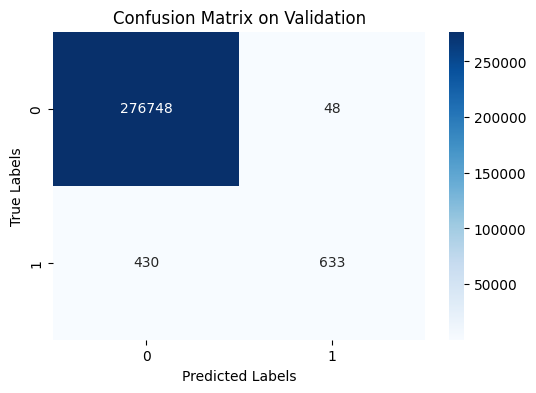

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Validation')
plt.show()


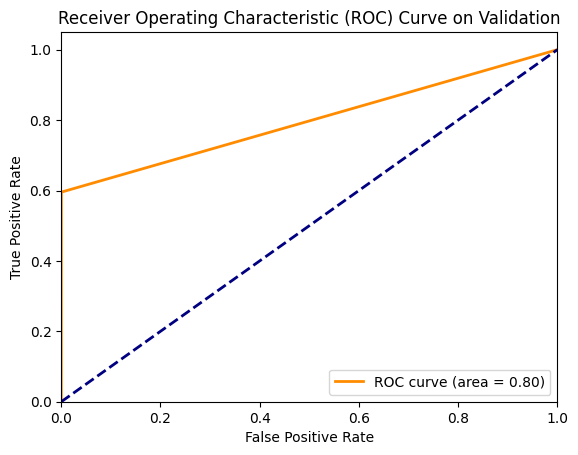

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Validation')
plt.legend(loc="lower right")
plt.show()

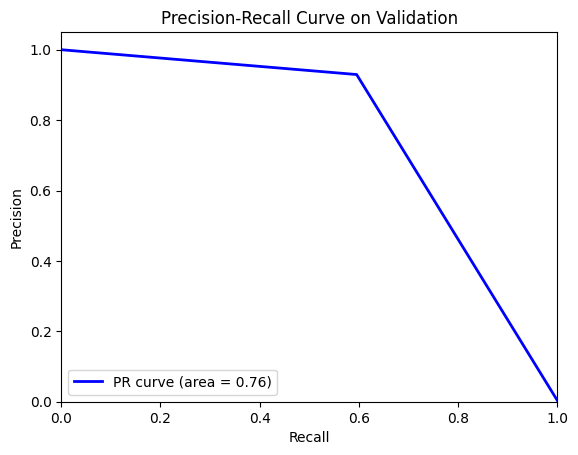

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, val_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Evaluate the model on the test set
test_predictions = rf_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, test_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276778
           1       0.93      0.60      0.73      1082

    accuracy                           1.00    277860
   macro avg       0.96      0.80      0.86    277860
weighted avg       1.00      1.00      1.00    277860



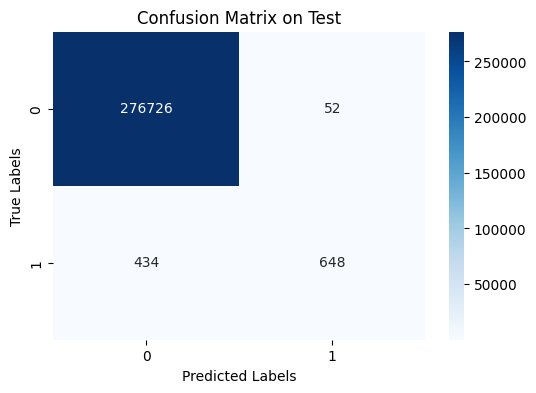

In [ ]:
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Test')
plt.show()

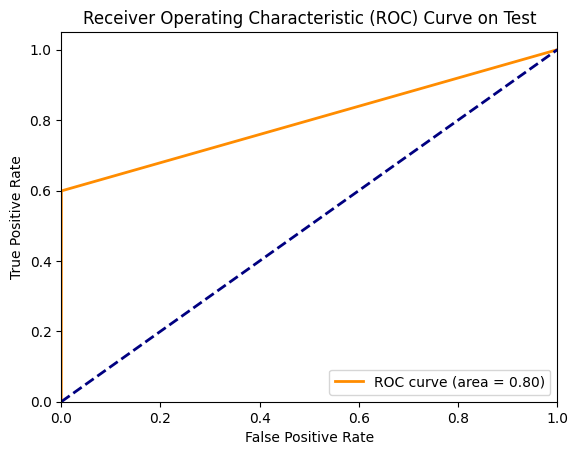

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test')
plt.legend(loc="lower right")
plt.show()

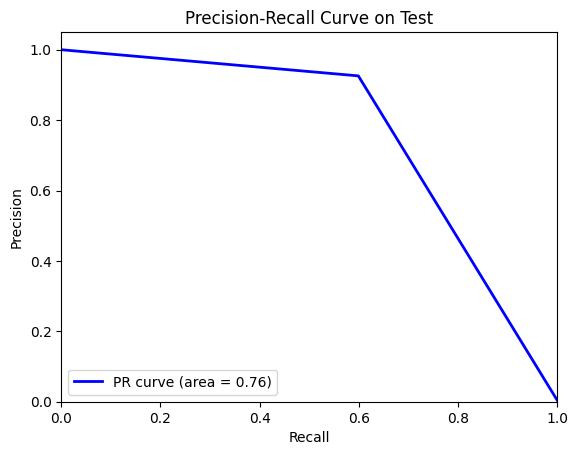

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test')
plt.legend(loc="lower left")
plt.show()

#### Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
nb_model = GaussianNB()

# Fit the model to the training data
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluate the model on the validation set
val_predictions = nb_model.predict(X_val)
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    276796
           1       0.23      0.47      0.31      1063

    accuracy                           0.99    277859
   macro avg       0.61      0.73      0.65    277859
weighted avg       1.00      0.99      0.99    277859



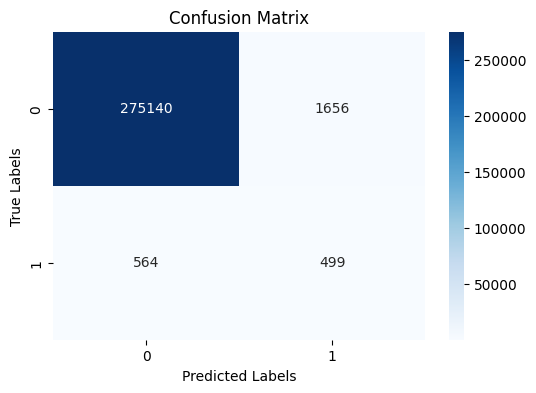

In [ ]:
cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

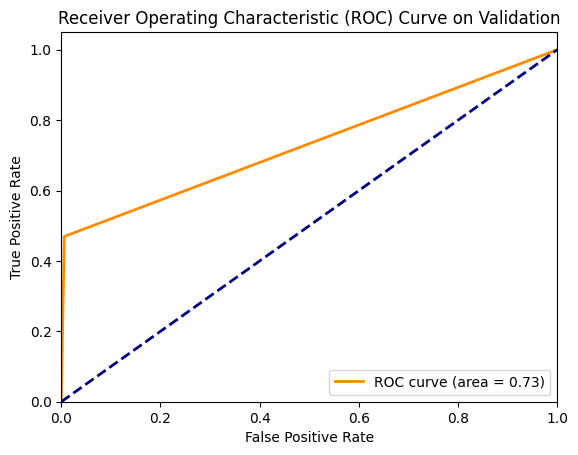

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Validation')
plt.legend(loc="lower right")
plt.show()

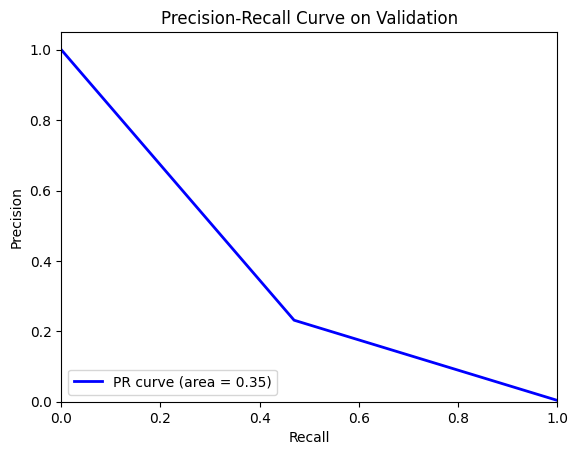

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, val_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Evaluate the model on the test set
test_predictions = nb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    276778
           1       0.23      0.46      0.31      1082

    accuracy                           0.99    277860
   macro avg       0.62      0.73      0.65    277860
weighted avg       0.99      0.99      0.99    277860



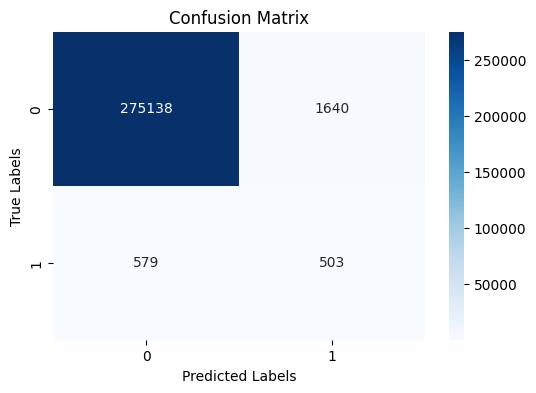

In [ ]:
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

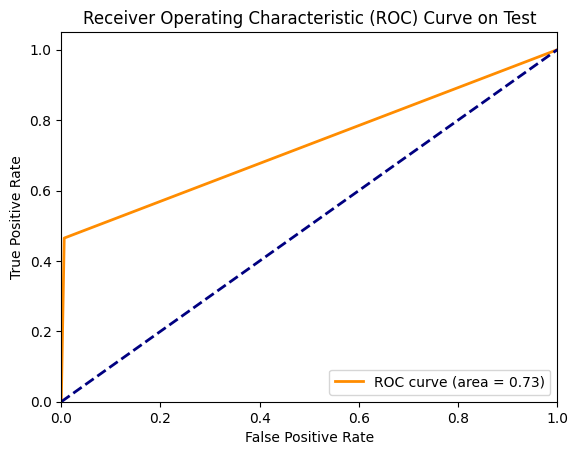

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test')
plt.legend(loc="lower right")
plt.show()

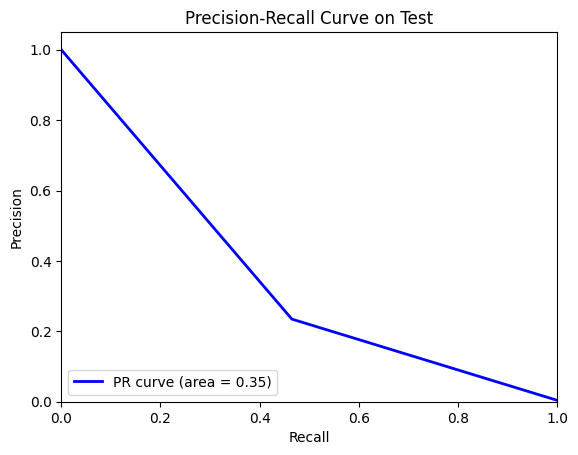

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test')
plt.legend(loc="lower left")
plt.show()

#### XGBoost

In [24]:
import xgboost as xgb

params = {
    'objective': 'binary:logistic',  # Binary classification
    'learning_rate': 0.1,             # Learning rate
    'n_estimators': 100,              # Number of trees (boosting rounds)
    'subsample': 0.8,                 # Subsample ratio of the training instances
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
    'min_child_weight': 1,            # Minimum sum of instance weight (hessian) needed in a child
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'scale_pos_weight': 1,            # Control the balance of positive and negative weights
    'n_jobs': -1                      # Number of parallel threads used to run XGBoost
}
# Initialize XGBoost classifier
XGB_model = xgb.XGBClassifier(**params)


# Fit the model to the training data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
# Evaluate the model on the validation set
from sklearn.metrics import classification_report
val_predictions = XGB_model.predict(X_val)
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276796
           1       0.83      0.61      0.70      1063

    accuracy                           1.00    277859
   macro avg       0.92      0.80      0.85    277859
weighted avg       1.00      1.00      1.00    277859



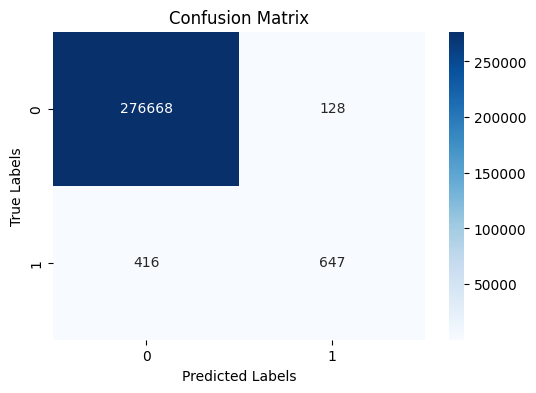

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

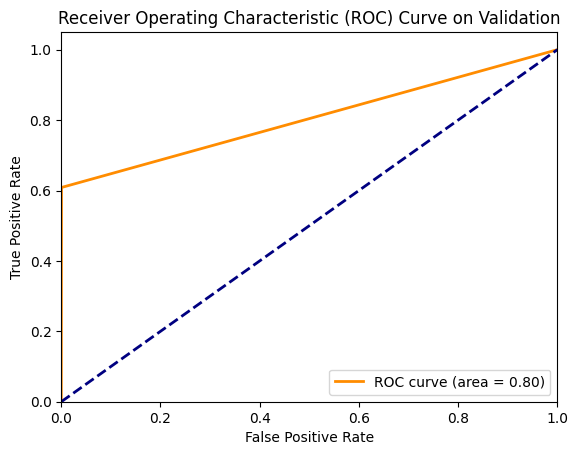

In [28]:
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Validation')
plt.legend(loc="lower right")
plt.show()

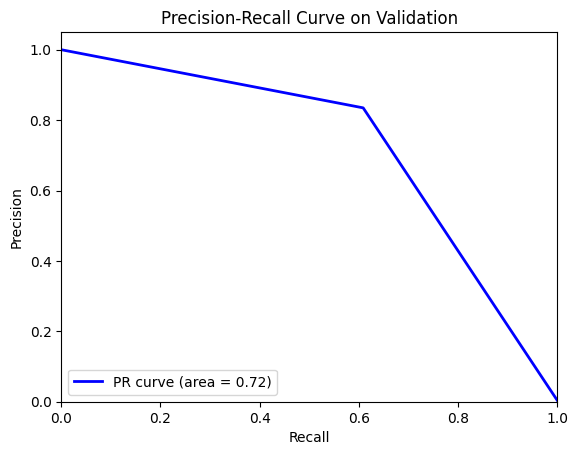

In [29]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, val_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation')
plt.legend(loc="lower left")
plt.show()

In [30]:
# Evaluate the model on the test set
test_predictions = XGB_model.predict(X_test)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276778
           1       0.85      0.64      0.73      1082

    accuracy                           1.00    277860
   macro avg       0.92      0.82      0.86    277860
weighted avg       1.00      1.00      1.00    277860



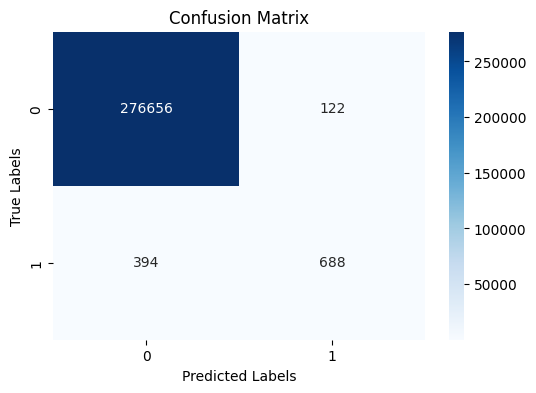

In [31]:
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

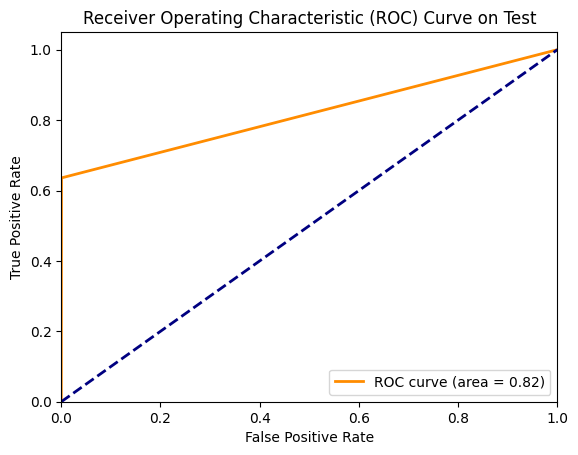

In [32]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test')
plt.legend(loc="lower right")
plt.show()

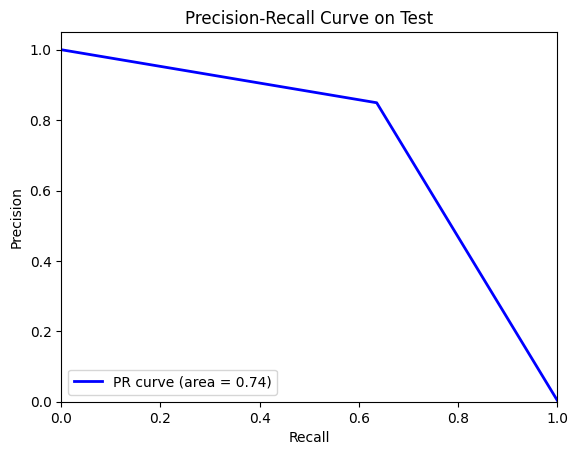

In [33]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test')
plt.legend(loc="lower left")
plt.show()

#### MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
mlp_model = Sequential()

# Add the first hidden layer
mlp_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))

# Add the second hidden layer
mlp_model.add(Dense(units=64, activation='relu'))

# Add the output layer
mlp_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11009 (43.00 KB)
Trainable params: 11009 (43.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/10
5066/5066 [==============================] - 27s 5ms/step - loss: 27.8319 - accuracy: 0.9893 - val_loss: 0.9882 - val_accuracy: 0.9959
Epoch 2/10
5066/5066 [==============================] - 23s 4ms/step - loss: 2.1305 - accuracy: 0.9922 - val_loss: 0.0955 - val_accuracy: 0.9889
Epoch 3/10
5066/5066 [==============================] - 22s 4ms/step - loss: 0.0377 - accuracy: 0.9940 - val_loss: 0.0200 - val_accuracy: 0.9955
Epoch 4/10
5066/5066 [==============================] - 23s 5ms/step - loss: 0.0320 - accuracy: 0.9941 - val_loss: 0.0274 - val_accuracy: 0.9962
Epoch 5/10
5066/5066 [==============================] - 23s 4ms/step - loss: 0.0327 - accuracy: 0.9941 - val_loss: 0.0208 - val_accuracy: 0.9954
Epoch 6/10
5066/5066 [==============================] - 22s 4ms/step - loss: 0.0309 - accuracy: 0.9939 - val_loss: 0.0206 - val_accuracy: 0.9962
Epoch 7/10
5066/5066 [==============================] - 24s 5ms/step - loss: 0.0277 - accuracy: 0.9940 - val_loss: 0.0186 - val_a

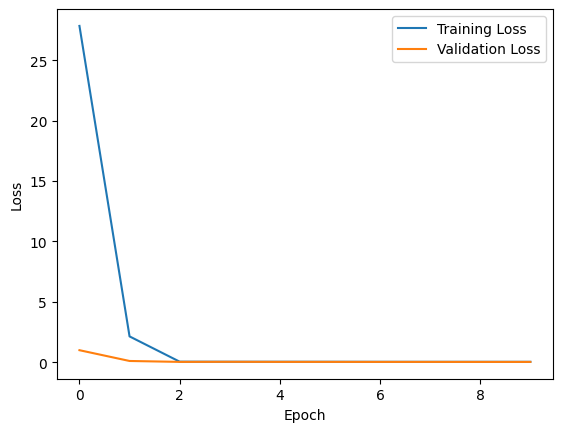

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

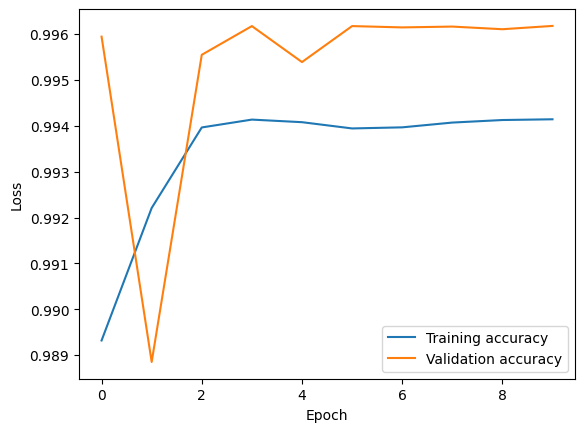

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the validation set
val_predictions = mlp_model.predict(X_val)
val_predictions = (val_predictions > 0.5).astype(int)
print(classification_report(y_val, val_predictions))

8684/8684 [==============================] - 16s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276796
           1       0.57      0.00      0.01      1063

    accuracy                           1.00    277859
   macro avg       0.78      0.50      0.50    277859
weighted avg       0.99      1.00      0.99    277859



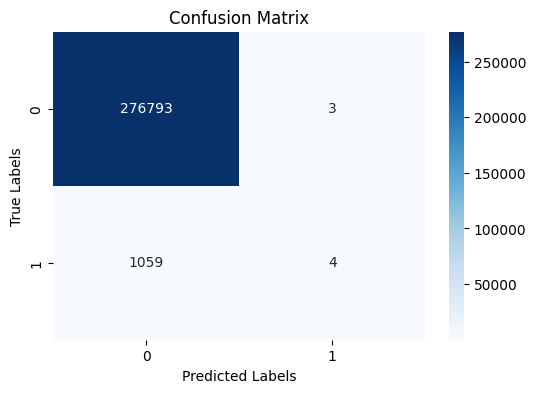

In [ ]:
cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

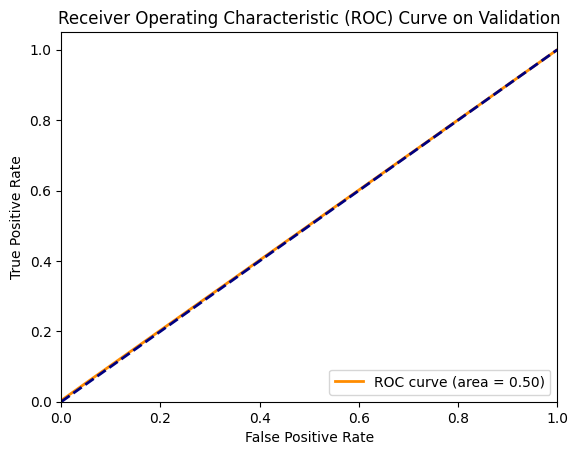

In [ ]:
from sklearn.metrics import precision_recall_curve,roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, val_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Validation')
plt.legend(loc="lower right")
plt.show()

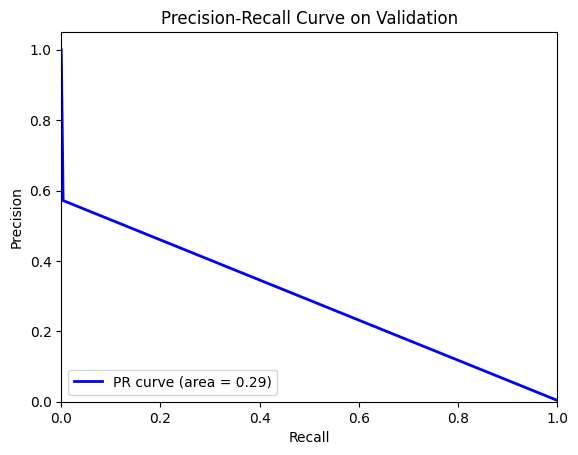

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_val, val_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Validation')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Evaluate the model on the test set
test_predictions = mlp_model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)
print(classification_report(y_test, test_predictions))

8684/8684 [==============================] - 16s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276778
           1       0.67      0.01      0.01      1082

    accuracy                           1.00    277860
   macro avg       0.83      0.50      0.50    277860
weighted avg       0.99      1.00      0.99    277860



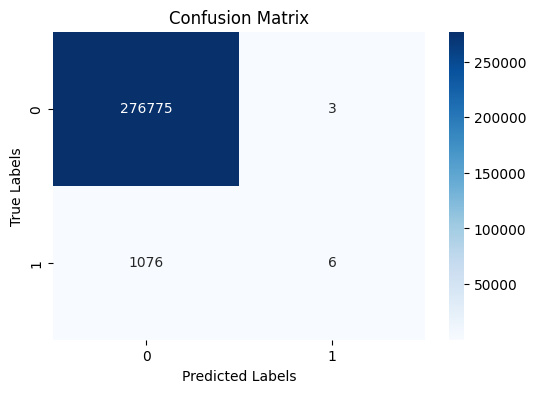

In [ ]:
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

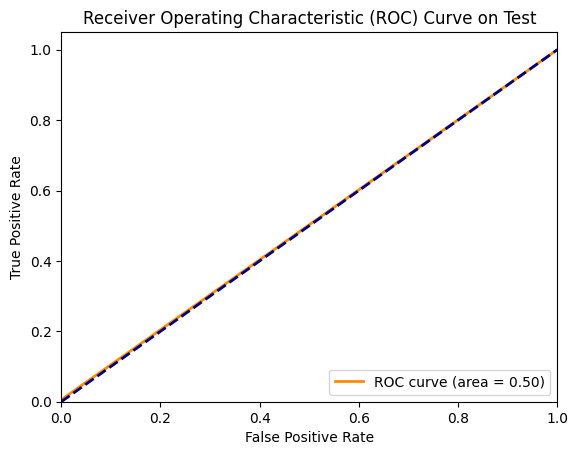

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)

# Compute AUROC
auroc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test')
plt.legend(loc="lower right")
plt.show()

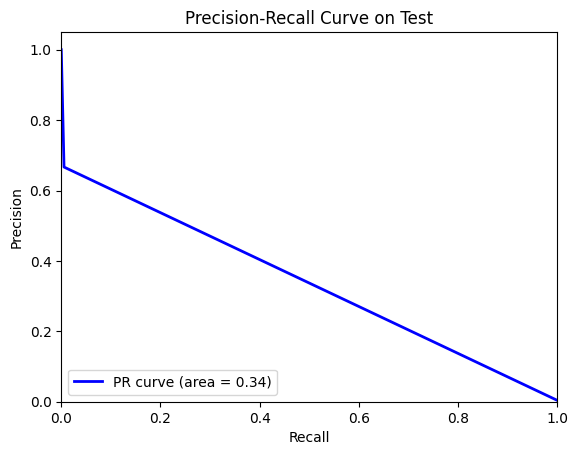

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, test_predictions)

# Compute Area Under the Curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test')
plt.legend(loc="lower left")
plt.show()